<a href="https://colab.research.google.com/github/hongo-daisuke/study-deep-learning-in-colaboratory/blob/master/simple_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# シンプルなDeep Learning

# データセットの読み込み
Irisデータセットを読み込み

In [ ]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()

# データの前処理

データの標準化を行う\
標準化(データから平均値を引いて標準偏差で割ったもの)は、平均値が0、標準偏差が1になるように変換する処理

ラベルをone-hot表現に変換する\
one-hot表現は一箇所だけ1で残りを0の配列

In [ ]:
from sklearn import preprocessing
from keras.utils import np_utils

# 標準化（データから平均値を引いて標準偏差で割ったもの）を行う。
scaler = preprocessing.StandardScaler()
scaler.fit(iris.data) # パラメータの計算
x = scaler.transform(iris.data) # データの変換

# ラベルをone-hot表現に変換
t = np_utils.to_categorical(iris.target)

# 訓練データとテストデータ
データを訓練用のデータとテスト用のデータに分割

In [ ]:
from sklearn.model_selection import train_test_split

# x_train: 訓練用の入力データ
# x_test: テスト用の入力データ
# t_train: 訓練用の正解データ
# t_test: テスト用の正解データ
# train_size=0.75: 75%が訓練用、25%がテスト用
x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)

# モデルの構築

4層からなる、シンプルなディープラーニングのモデルを構築

Dense(中間層のニューロンの数, 入力層のニューロンの数)\
Activation(使用する活性化関数)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, input_dim=4))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
 activation_2 (Activation)   (None, 3)                 0         
                                                                 
Total params: 1,315
Trainable params: 1,315
Non-trainabl

# 学習

訓練用の入力データと正解データを使って、モデルを訓練します。\
fit: モデルを訓練する

In [ ]:
history = model.fit(x_train, t_train, epochs=30, batch_size=8)

Epoch 1/30
14/14 [==============================] - 1s 3ms/step - loss: 1.1937 - accuracy: 0.3482
Epoch 2/30
14/14 [==============================] - 0s 3ms/step - loss: 1.0440 - accuracy: 0.4375
Epoch 3/30
14/14 [==============================] - 0s 3ms/step - loss: 0.9374 - accuracy: 0.7143
Epoch 4/30
14/14 [==============================] - 0s 4ms/step - loss: 0.8528 - accuracy: 0.7232
Epoch 5/30
14/14 [==============================] - 0s 6ms/step - loss: 0.7798 - accuracy: 0.7232
Epoch 6/30
14/14 [==============================] - 0s 7ms/step - loss: 0.7186 - accuracy: 0.7232
Epoch 7/30
14/14 [==============================] - 0s 5ms/step - loss: 0.6666 - accuracy: 0.7411
Epoch 8/30
14/14 [==============================] - 0s 3ms/step - loss: 0.6228 - accuracy: 0.7411
Epoch 9/30
14/14 [==============================] - 0s 5ms/step - loss: 0.5869 - accuracy: 0.7411
Epoch 10/30
14/14 [==============================] - 0s 3ms/step - loss: 0.5556 - accuracy: 0.7589
Epoch 11/30
14/14 [

# 学習の推移

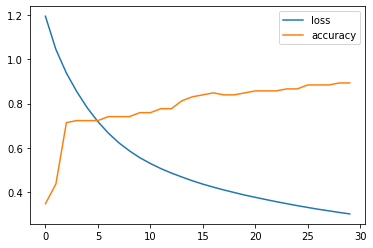

In [ ]:
import matplotlib.pyplot as plt

hist_loss = history.history['loss']
hist_acc = history.history['accuracy']

plt.plot(np.arange(len(hist_loss)), hist_loss, label='loss')
plt.plot(np.arange(len(hist_acc)), hist_acc, label='accuracy')
plt.legend()
plt.show()

# 評価
モデルの評価を行う \
evaluate: 入力、正解データから誤差などを計算。

In [ ]:
loss, accuracy = model.evaluate(x_test, t_test)
print(loss, accuracy)

2/2 [==============================] - 0s 7ms/step - loss: 0.3685 - accuracy: 0.8947
0.3684815764427185 0.8947368264198303


# 予測

In [ ]:
model.predict(x_test)

array([[0.03975269, 0.7948786 , 0.1653687 ],
       [0.03810436, 0.30560708, 0.6562886 ],
       [0.01352802, 0.15322168, 0.8332503 ],
       [0.093472  , 0.72376853, 0.18275951],
       [0.0241391 , 0.44214073, 0.5337202 ],
       [0.0129159 , 0.13036598, 0.8567181 ],
       [0.983084  , 0.00919903, 0.00771688],
       [0.01051173, 0.16518423, 0.8243041 ],
       [0.974274  , 0.01470835, 0.01101766],
       [0.01721406, 0.28832594, 0.69446   ],
       [0.9863062 , 0.00740392, 0.00628987],
       [0.02628855, 0.38160565, 0.5921057 ],
       [0.0127968 , 0.1951538 , 0.7920494 ],
       [0.0868415 , 0.6604265 , 0.25273198],
       [0.9755719 , 0.01499482, 0.00943328],
       [0.08329741, 0.45442286, 0.46227965],
       [0.97932065, 0.01108544, 0.00959392],
       [0.06359138, 0.47606176, 0.4603469 ],
       [0.5519602 , 0.33923894, 0.10880097],
       [0.05930374, 0.7189298 , 0.22176641],
       [0.9441735 , 0.03517902, 0.02064738],
       [0.07267217, 0.6735243 , 0.25380352],
       [0.

## 保存

In [ ]:
from keras.models import load_model

model.save('model.h5')
load_model('model.h5')